# **Segmentation 🗺️**

## **Librerias 📚**

In [11]:
import pandas as pd
# import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, jaccard_score, classification_report, confusion_matrix,log_loss
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

## **Load & Trnasform Data 🪟**

In [12]:
data = pd.read_csv("./Data/Client_segmentation.csv",encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [13]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
temp = data[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
data2 = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data2], layout = layout)
iplot(choromap, validate=False)

             Pais  Conteo
0  United Kingdom  495478
1         Germany    9495
2          France    8557
3            EIRE    8196
4           Spain    2533
5     Netherlands    2371
6         Belgium    2069
7     Switzerland    2002
8        Portugal    1519
9       Australia    1259


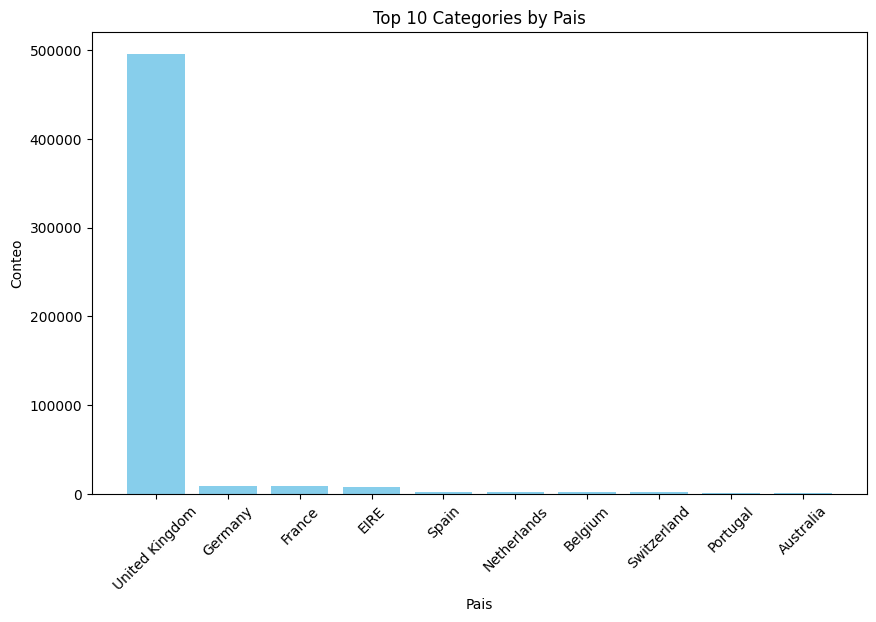

In [15]:
conteo = data['Country'].value_counts()
data_top = pd.DataFrame({'Pais':conteo.index, 'Conteo':conteo.values})

data_nueva = data_top.nlargest(10, 'Conteo')
print(data_nueva)
plt.figure(figsize=(10, 6))
plt.bar(data_nueva['Pais'], data_nueva['Conteo'], color='skyblue')
plt.xlabel('Pais')
plt.ylabel('Conteo')
plt.title('Top 10 Categories by Pais')
plt.xticks(rotation=45)
plt.show()

In [16]:
data['order_canceled'] = data['InvoiceNo'].apply(lambda x:int('C' in x))
mean_canceled = data['order_canceled'].mean()*100
print('Porcentaje total de ordenes canceladas: {:.2f}%'.format(mean_canceled))

Porcentaje total de ordenes canceladas: 1.71%


In [17]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,0
